#Dependencies

In [1]:
!pip install tensorflow
!pip install shap

     |████████████████████████████████| 462 kB 2.0 MB/s 
     |████████████████████████████████| 564 kB 4.9 MB/s 


In [2]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from tensorflow.keras import models, layers, utils, backend as K
import shap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [5]:
import pandas as pd

In [6]:
Combo=pd.read_csv("data.csv")

In [7]:
display(Combo)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [8]:
Combo.isna().sum().sum()

0

#PFAS dataframe

In [9]:
!pip install xport

In [10]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


In [11]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [12]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


#making the ouside DF


In [13]:
DF=Combo.copy()
for col in DF.columns:
  if (col != 'SEQN') and (col != 'LBDPFDEL') and (col != 'LBXPFDE') and (col in df_PFAS):
    DF=DF.drop(columns=col)
DF


,LBDPFDEL,LBXPFDE,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,29.1,0.0,0.20,0.0,0.20,0.0,63.5,0.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,6.0,0.0,1.70,0.0,0.20,0.0,23.5,0.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,13.4,0.0,1.20,0.0,0.07,1.0,6.5,0.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,24.6,0.0,1.50,0.0,0.10,0.0,77.9,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,11.6,0.0,2.70,0.0,0.07,1.0,9.5,0.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,3.6,0.0,2.60,0.0,0.07,1.0,1.7,0.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,11.0,0.0,0.50,0.0,0.07,1.0,1.2,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.4,0.0,0.14,1.0,0.07,1.0,1.2,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,9.1,0.0,2.00,0.0,0.20,0.0,1.2,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [14]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [15]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [16]:
d_p.pop("URXTLC")

0.0

In [17]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [18]:
len(d_p)

25

In [19]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [20]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [21]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [22]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [23]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [24]:
len(binary_list)

19

In [25]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [26]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [28]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [29]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [30]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [31]:
print(len(intersection_list))

19


In [32]:
intersection_list

['URDMOHLC',
 'URDDCBLC',
 'URDPPBLC',
 'URD14DLC',
 'URDECPLC',
 'URDMZPLC',
 'URDCOPLC',
 'URDBP3LC',
 'URDMEPLC',
 'URDMHHLC',
 'URDBPHLC',
 'URDMPBLC',
 'URDMC1LC',
 'URDBPSLC',
 'URDCNPLC',
 'URDTRSLC',
 'URDMCHLC',
 'URDMBPLC',
 'URDMIBLC']

In [33]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [34]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [35]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [36]:
print(cols_to_drop)

['URXMOH', 'URXDCB', 'URXPPB', 'URX14D', 'URXECP', 'URXMZP', 'URXCOP', 'URXBP3', 'URXMEP', 'URXMHH', 'URXBPH', 'URXMPB', 'URXMC1', 'URXBPS', 'URXCNP', 'URXTRS', 'URXMCH', 'URXMBP', 'URXMIB']


In [37]:
type(cols_to_drop)

list

In [38]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [39]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [40]:
display(DF)

,LBDPFDEL,LBXPFDE,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,0.20,0.0,0.0,0.20,0.0,0.0,0.07,1.0,2.20,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.0,0.30,0.0,0.0,0.20,0.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.0,0.10,0.0,0.0,0.07,1.0,0.0,0.07,1.0,1.10,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.0,0.20,0.0,0.0,0.10,0.0,0.0,0.07,1.0,36.40,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.0,0.10,0.0,0.0,0.07,1.0,0.0,83.10,0.0,107.10,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.0,0.0,0.07,1.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.0,0.20,0.0,0.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.0,0.90,0.0,1.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.0,0.20,0.0,0.0,0.20,0.0,1.0,0.07,1.0,0.71,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


#taking log of continuous values

In [41]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [42]:
display(DF)

,LBDPFDEL,LBXPFDE,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,-1.609438,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,0.788457,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,0.0,-1.203973,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,0.0,-2.302585,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.095310,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,0.0,-1.609438,0.0,0.0,-2.302585,0.0,0.0,-2.659260,1.0,3.594569,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,0.0,-2.302585,0.0,0.0,-2.659260,1.0,0.0,4.420045,0.0,4.673763,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,-2.659260,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,0.0,-1.609438,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,0.0,-0.105361,0.0,1.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,0.0,-1.609438,0.0,0.0,-1.609438,0.0,1.0,-2.659260,1.0,-0.342490,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


#Splitting the data
We are trying to predict detection level of Perfluorodecanoic acid (ug/L)

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DF, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBXPFDE']
Y_test=test['LBXPFDE']

In [44]:
include=list(X_train.columns)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [47]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', reg.score(X_train_scaled, Y_train)*100)
print('R squared test set', reg.score(X_test_scaled, Y_test)*100)

R squared training set 0.0
R squared test set -0.006030993689876141


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.6995524960803411
MSE test set 0.6811731081230619


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.8363925490344477
RMSE test set 0.8253321198905698


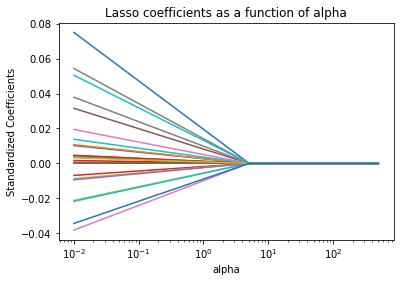

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_


0.030888688639549758

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.030888688639549758)

In [ ]:
Lasso(alpha=0.008585019798920172)

Lasso(alpha=0.008585019798920172)

In [ ]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(0.0, array([-0.19297807, -0.2149006 ,  1.24707906, -1.1859661 , -0.56035565,
       -0.28474318, -1.44926359, -0.73338842,  0.99706141, -0.07694585,
       -0.11187001, -0.13177735, -0.22948679, -0.11453674, -0.04205791,
       -0.05953154, -0.14074062, -0.35483968, -0.04857862, -0.09437883,
       -1.80799453,  1.63001968, -0.80393895, -0.17768668, -0.60651951,
        0.79208247, -0.0843399 , -0.16867235,  0.41864997, -0.74556073,
       -0.34316637])), (0.0, array([-0.19297807, -0.2149006 ,  0.24009315, -1.1859661 , -0.56035565,
        0.9998767 , -1.44926359,  0.9456269 , -1.00294725, -0.07694585,
       -0.11187001, -0.13177735, -0.22948679, -0.11453674, -0.04205791,
       -0.05953154, -0.14074062, -0.35483968, -0.04857862, -0.09437883,
        0.55309902,  1.38924865, -0.80393895, -0.17768668,  0.62029609,
       -1.2624948 , -0.0843399 , -0.16867235,  0.61980215, -0.74556073,
       -0.34316637])), (0.0, array([-0.19297807, -0.2149006 , -0.57779214,  0.84319442, -0.56035565,

In [ ]:
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
y_pred

array([-1.62945688, -1.89710117, -1.63210236, -1.67774446, -1.6433952 ,
       -1.54898325, -1.64934196, -1.8929169 , -1.39059192, -1.49267764,
       -1.87513987, -1.57065367, -1.84962386, -1.73833007, -1.64991519,
       -1.66287589, -1.70233665, -1.75404901, -1.57863258, -1.72275785,
       -1.76197574, -1.68377202, -1.69138658, -1.84213101, -1.82123528,
       -1.73308815, -1.54594431, -1.87201289, -1.57712554, -1.8994729 ,
       -1.75243798, -1.86708962, -1.78232814, -1.57865137, -1.68464621,
       -1.84716302, -1.66662928, -1.70371419, -1.71470648, -1.6575072 ,
       -1.62113643, -1.59549501, -1.60166745, -1.65760959, -1.58064644,
       -1.66173803, -1.61023951, -1.50009606, -1.98460926, -1.71595618,
       -1.6432945 , -1.23351311, -1.90100081, -1.70504584, -1.47410457,
       -1.72650144, -1.7280496 , -1.54181669, -1.68566569, -1.71759846,
       -1.61927555, -1.89515066, -1.6186718 , -1.81611629, -1.66822806,
       -1.437522  , -1.73067621, -1.69760062, -1.60877972, -1.83

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.01975667412752613
R squared test set 0.010387355540438903
MSE training set 0.6857316653801843
MSE test set 0.6740568685371942
RMSE training set 0.8280891651145934
RMSE test set 0.821009664094884


X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names


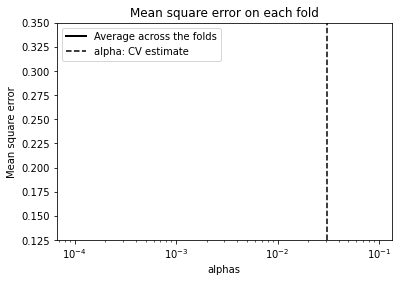

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.125, 0.35
plt.ylim(ymin, ymax);

In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1706,-2.659260,-1.629457
1127,-2.659260,-1.829537
841,-2.659260,-1.656359
1286,-2.659260,-1.531130
1853,-2.659260,-1.886132
...,...,...
142,0.832909,-1.816693
1481,0.832909,-1.657284
1599,0.832909,-1.765230
1406,1.280934,-1.301547


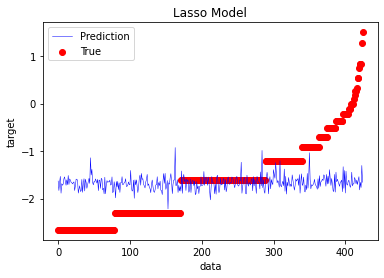

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso Model")
plt.legend()
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [ ]:
list(X_test.index)==list(Y_test.index)

True

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
list(y_pred_series.index)==list(Y_test.index)

True

In [ ]:
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
1706,-2.659260,0.405465
1127,-2.659260,-1.609438
841,-2.659260,-2.659260
1286,-2.659260,-1.609438
1853,-2.659260,-1.203973
...,...,...
142,0.832909,-2.659260
1481,0.832909,-1.609438
1599,0.832909,-0.916291
1406,1.280934,0.470004


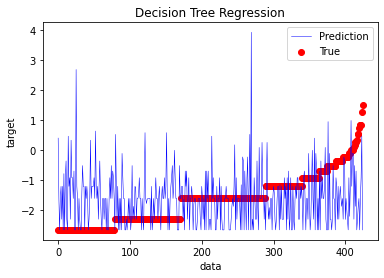

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.9516486299927386
R squared test set -1.1634141433206193
MSE training set 0.03382432157748384
MSE test set 1.4735706652092626
RMSE training set 0.1839138971842091
RMSE test set 1.213907189701611


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state = 0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_test)

In [ ]:
print('R squared training set', reg.score(X_train, Y_train)*100)
print('R squared test set', reg.score(X_test, Y_test)*100)

R squared training set 80.44297108964523
R squared test set -12.198544316837268


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.1368116839015407
MSE test set 0.7642202215184949


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.369880634666835
RMSE test set 0.8741969008858902


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1706,-2.659260,-1.460318
1127,-2.659260,-1.995354
841,-2.659260,-1.872448
1286,-2.659260,-1.033658
1853,-2.659260,-1.858601
...,...,...
142,0.832909,-2.019127
1481,0.832909,-1.491251
1599,0.832909,-1.410099
1406,1.280934,-0.896839


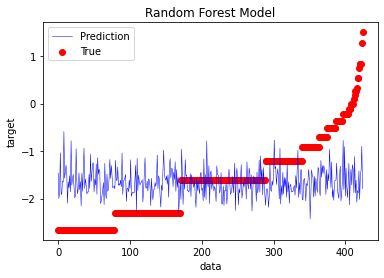

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: URXMHP               Importance: 0.18
Variable: URXEPB               Importance: 0.15
Variable: URXBPF               Importance: 0.13
Variable: URXTLC               Importance: 0.11
Variable: URXBUP               Importance: 0.08
Variable: URXMNP               Importance: 0.08
Variable: URDTRSLC             Importance: 0.04
Variable: URDMC1LC             Importance: 0.02
Variable: URDMCHLC             Importance: 0.02
Variable: URDMHPLC             Importance: 0.02
Variable: URDBPSLC             Importance: 0.02
Variable: URDBP3LC             Importance: 0.01
Variable: URDBPHLC             Importance: 0.01
Variable: URDTLCLC             Importance: 0.01
Variable: URDBUPLC             Importance: 0.01
Variable: URDEPBLC             Importance: 0.01
Variable: URDMPBLC             Importance: 0.01
Variable: URD14DLC             Importance: 0.01
Variable: URDDCBLC             Importance: 0.01
Variable: URDCNPLC             Importance: 0.01
Variable: URDMBPLC             Importanc

In [ ]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['URXMHP', 'URXEPB', 'URXBPF', 'URXTLC', 'URXBUP', 'URXMNP', 'URDTRSLC', 'URDMC1LC', 'URDMCHLC', 'URDMHPLC', 'URDBPSLC', 'URDBP3LC', 'URDBPHLC', 'URDTLCLC', 'URDBUPLC', 'URDEPBLC', 'URDMPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDMBPLC', 'URDMIBLC', 'URDMNPLC', 'URDMZPLC', 'URDBPFLC']


In [ ]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_test[include])

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))

R squared training set 0.8044297108964523
R squared test set -0.13906193885504026


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg_important.predict(X_train[include])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg_important.predict(X_test[include])
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.1371967189782527
MSE test set 0.7758515696753588


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.3704007545595077
RMSE test set 0.8808243693696031


In [ ]:
pred_dict={}
R_train_dict={}
R_test_dict={}
mse_train_dict={}
mse_test_dict={}
rmse_train_dict={}
rmse_test_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_train[used], Y_train)
  y_pred = rf.predict(X_test[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_test=metrics.r2_score(Y_test,y_pred)
  R_test_dict[i]=R_test
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_test = mean_squared_error(Y_test, y_pred)
  mse_test_dict[i]=mse_test
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
  rmse_test_dict[i]=rmse_test

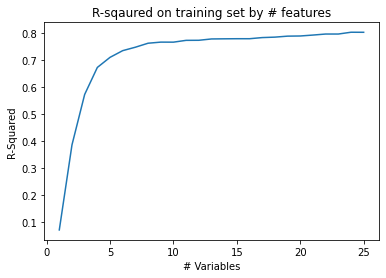

In [ ]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

levels off around 4-6 features

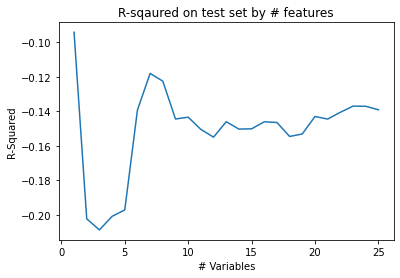

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in R_test_dict.keys()], 
         [float(value) for value in R_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on test set by # features');

highest at 3-4 features

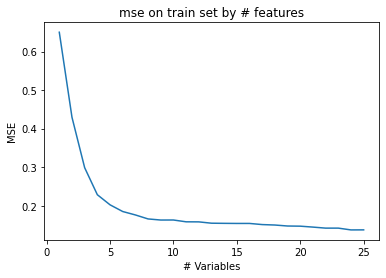

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

levels off around 4-6 features

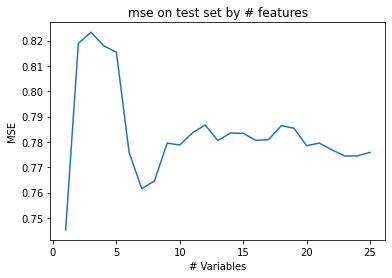

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_test_dict.keys()], 
         [float(value) for value in mse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on test set by # features');

lowest around 3 features

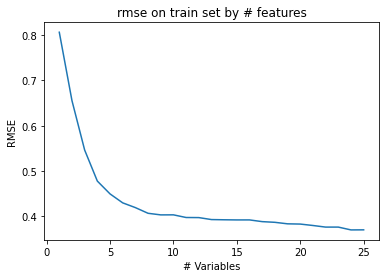

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

levels off around 4-6 features

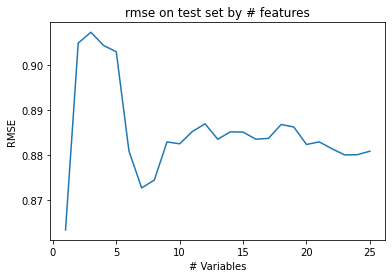

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_test_dict.keys()], 
         [float(value) for value in rmse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on test set by # features');

lowest around 3 features

**verdict: use 3 features**

In [ ]:
include[0:3]

['URXMHP', 'URXEPB', 'URXBPF']

In [ ]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [ ]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [ ]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.5731657454848766
R squared test set -0.20868893014218592
MSE training set 0.2985929681586462
MSE test set 0.8232767435304387
RMSE training set 0.5464366094604627
RMSE test set 0.9073459888765909


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1706,-2.659260,-1.634684
1127,-2.659260,-2.425471
841,-2.659260,-1.296493
1286,-2.659260,-1.198661
1853,-2.659260,-2.403834
...,...,...
142,0.832909,-2.007183
1481,0.832909,-1.612886
1599,0.832909,-1.756675
1406,1.280934,-1.487789


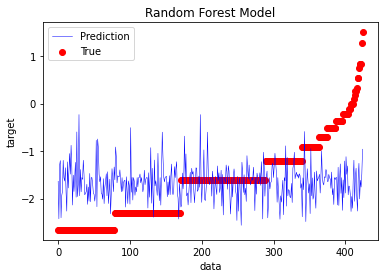

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

In [ ]:
X=DF.drop(columns=['LBDPFDEL','LBXPFDE'])
Y=DF['LBXPFDE']

In [ ]:
#X = sm.add_constant(X)
reg = sm.OLS(Y, sm.add_constant(X)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                LBXPFDE   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.686
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.61e-06
Time:                        14:23:52   Log-Likelihood:                -2587.3
No. Observations:                2124   AIC:                             5239.
Df Residuals:                    2092   BIC:                             5420.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7518      0.080    -21.969      0.0

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
print("Parameters: ", reg.params)
print("R2: ", reg.rsquared)

Parameters:  const      -1.751767
URDBP3LC    0.078341
URDBPHLC    0.162929
URXTLC      0.011560
URDTLCLC   -0.026793
URDTRSLC   -0.005240
URXBUP      0.042019
URDBUPLC    0.067852
URXEPB     -0.003757
URDEPBLC   -0.075849
URDMPBLC    0.187091
URDPPBLC    0.029958
URD14DLC   -0.054949
URDDCBLC    0.023534
URDCNPLC    0.164747
URDCOPLC   -0.236503
URDECPLC    0.155760
URDMBPLC   -0.408735
URDMC1LC    0.136788
URDMEPLC   -0.435062
URDMHHLC   -0.498816
URDMCHLC    0.152198
URXMHP     -0.001206
URDMHPLC    0.014877
URDMIBLC    0.108024
URXMNP     -0.011513
URDMNPLC    0.026597
URDMOHLC    0.375401
URDMZPLC    0.314718
URXBPF      0.014090
URDBPFLC    0.152967
URDBPSLC   -0.156903
dtype: float64
R2:  0.03827732246380877


In [ ]:
print("Standard errors: ", reg.bse)

Standard errors:  const       0.079738
URDBP3LC    0.098519
URDBPHLC    0.095425
URXTLC      0.014024
URDTLCLC    0.051065
URDTRSLC    0.043806
URXBUP      0.018627
URDBUPLC    0.058908
URXEPB      0.016365
URDEPBLC    0.054204
URDMPBLC    0.243163
URDPPBLC    0.177916
URD14DLC    0.149815
URDDCBLC    0.091052
URDCNPLC    0.168913
URDCOPLC    0.495265
URDECPLC    0.373476
URDMBPLC    0.169994
URDMC1LC    0.064429
URDMEPLC    0.431137
URDMHHLC    0.257378
URDMCHLC    0.044791
URXMHP      0.033294
URDMHPLC    0.058741
URDMIBLC    0.128661
URXMNP      0.028155
URDMNPLC    0.058652
URDMOHLC    0.296584
URDMZPLC    0.129869
URXBPF      0.016641
URDBPFLC    0.050394
URDBPSLC    0.065153
dtype: float64


In [ ]:
y_pred=reg.fittedvalues

In [ ]:

print(list(X.index)==list(Y.index))
y_pred_series=pd.Series(y_pred,index=X.index)
print(list(y_pred_series.index)==list(Y.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1061,-2.659260,-1.741002
877,-2.659260,-1.766611
881,-2.659260,-1.294515
886,-2.659260,-1.762679
887,-2.659260,-1.724168
...,...,...
1142,1.568616,-0.807594
721,1.589235,-1.701538
2082,1.987874,-1.143514
1509,2.694627,-1.667877


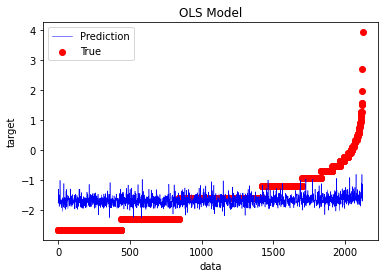

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install shap

In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import shap

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from collections import defaultdict

In [ ]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_train
dev_data=X_test_scaled

<BarContainer object of 36 artists>

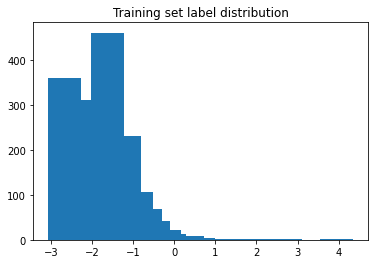

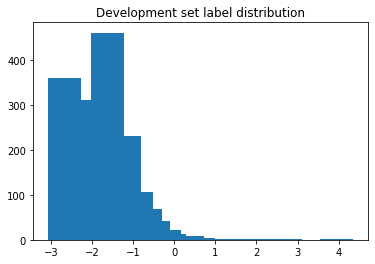

In [ ]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Training set label distribution")
k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Development set label distribution")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.505899312087744
R squared test set -0.27812841739644467
MSE training set 1.2826354118873986
MSE test set 0.8705742023831349
RMSE training set 1.1325349495213817
RMSE test set 0.9330456593238805


X has feature names, but MLPRegressor was fitted without feature names
X has feature names, but MLPRegressor was fitted without feature names


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1706,-2.659260,-1.189341
1127,-2.659260,-1.811762
841,-2.659260,-2.079982
1286,-2.659260,-0.728214
1853,-2.659260,-1.818067
...,...,...
142,0.832909,-1.701284
1481,0.832909,-2.020715
1599,0.832909,-0.235711
1406,1.280934,-1.170600


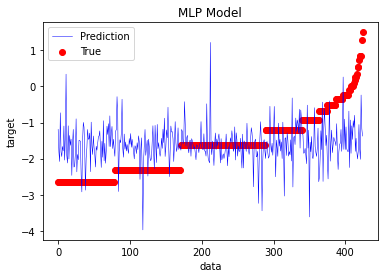

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

# All plots

In [ ]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])

#lasso
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)
y_pred_series=pd.Series(y_pred,index=X_test.index)